In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")


In [12]:
df = pd.read_csv("Mall_Customers.csv")

sub_df =df.drop(columns = ["CustomerID"])

In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# 5 number summery min Q1 Q2 Q3 max

In [15]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
min,1.00,18.00,15.0,1.00
25%,50.75,28.75,41.5,34.75
50%,100.50,36.00,61.5,50.00
75%,150.25,49.00,78.0,73.00
max,200.00,70.00,137.0,99.00


<AxesSubplot:xlabel='Age', ylabel='Count'>

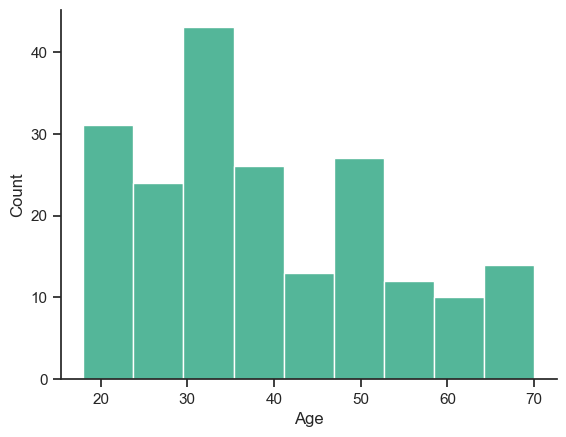

In [20]:
sns.histplot(df["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

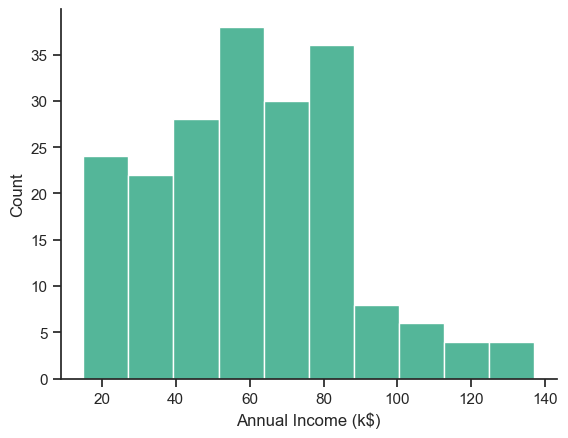

In [23]:
sns.histplot(df["Annual Income (k$)"])

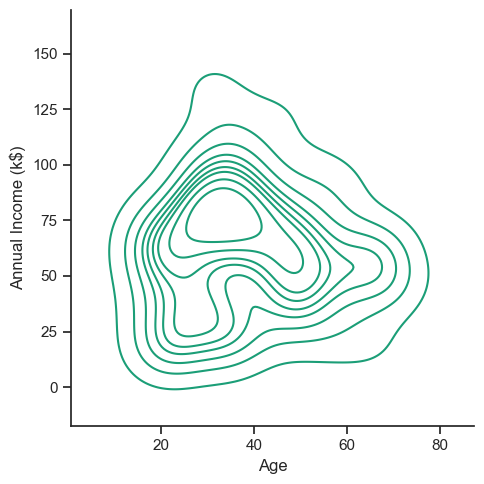

In [25]:
sns.displot(df, x="Age", y="Annual Income (k$)" , kind="kde")

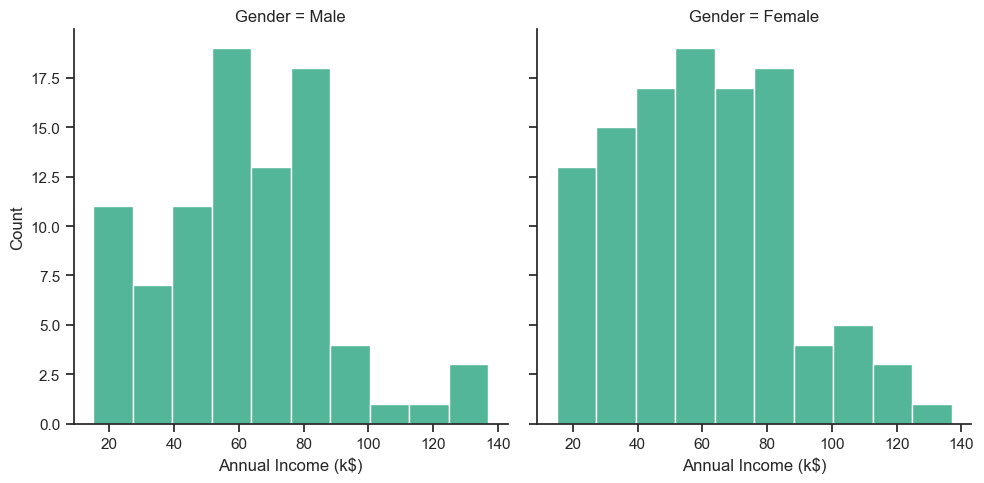

In [26]:
sns.displot(df, x="Annual Income (k$)", col="Gender")

In [27]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

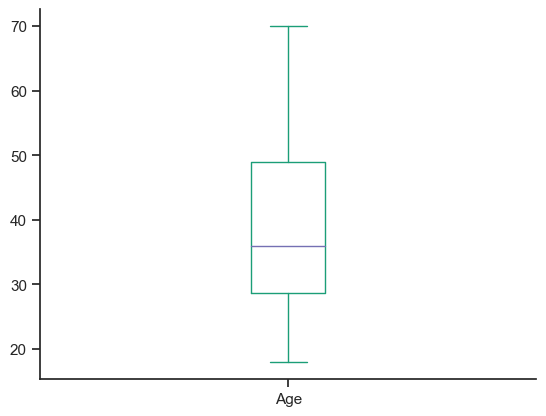

In [29]:
df['Age'].plot(kind='box')
plt.show()

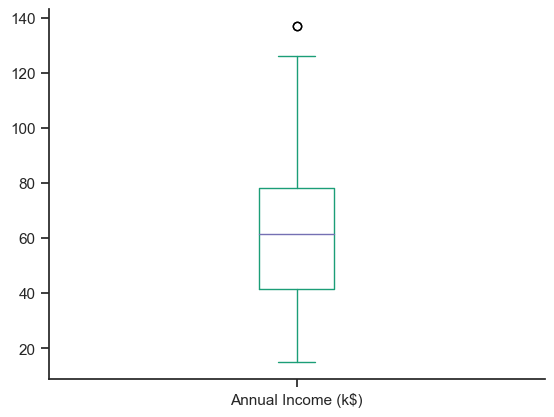

In [31]:
df['Annual Income (k$)'].plot(kind='box')
plt.show()

In [13]:
gender_percent = pd.DataFrame()
gender_percent["Count"] = df.groupby("Gender")["CustomerID"].count()
gender_percent["Percent"] = gender_percent["Count"] / gender_percent["Count"].sum() * 100
gender_percent["Percent"] = gender_percent["Percent"].astype(int)

female = gender_percent["Percent"].iloc[0]
male = gender_percent["Percent"].iloc[1]

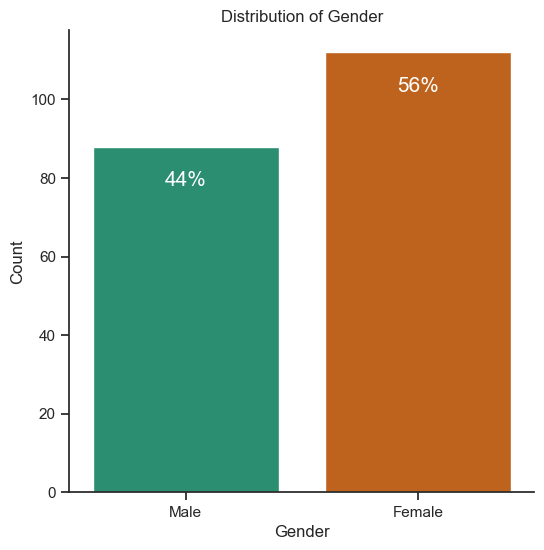

In [14]:
plt.figure(figsize = (6, 6))
sns.countplot(data = df, x = "Gender")
plt.annotate(str(female)+"%", xy=(1, gender_percent["Count"].iloc[0]-10), color = 'white', size = 15, ha = 'center')
plt.annotate(str(male)+"%", xy=(0,gender_percent["Count"].iloc[1]-10), color = 'white', size = 15, ha = 'center')
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

<Figure size 1500x600 with 0 Axes>

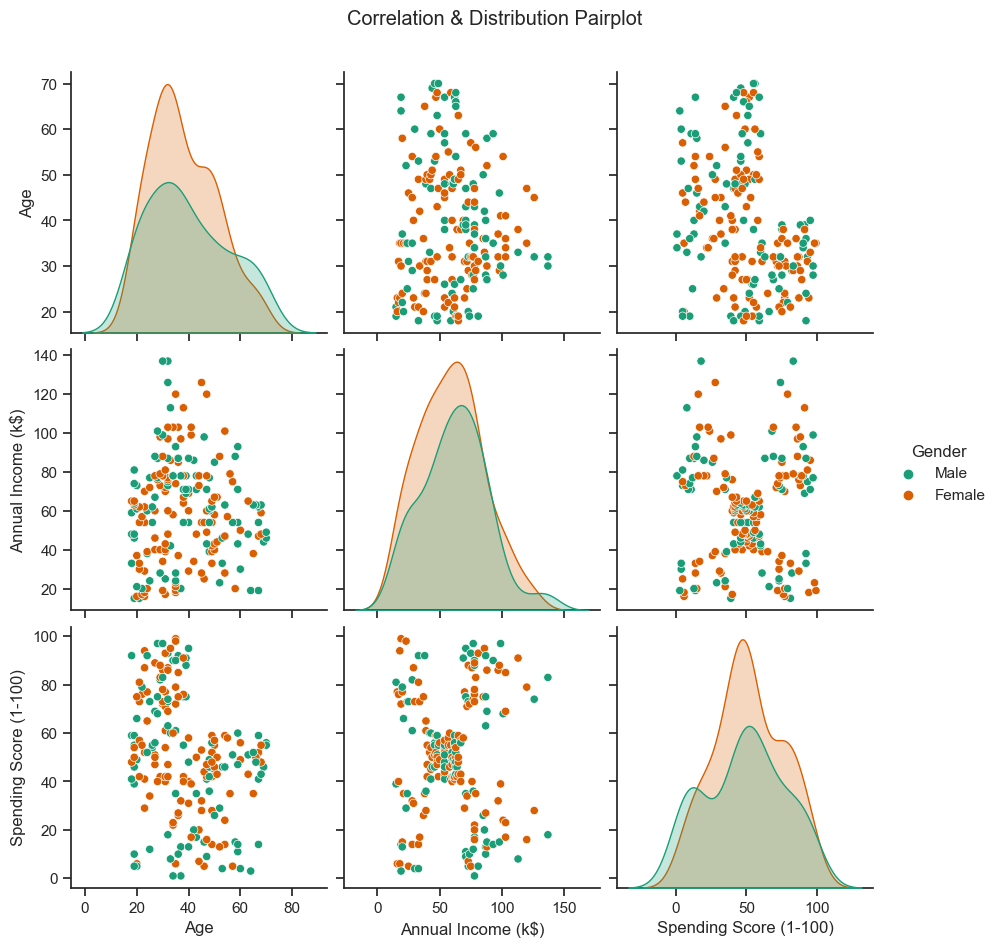

In [15]:
plt.figure(figsize = (15, 6))
sns.pairplot(sub_df, hue = "Gender", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

In [16]:
scaler = StandardScaler()
features =df[["Age", "Annual Income (k$)"]]
std_features = scaler.fit_transform(features)
std_features_df = pd.DataFrame({"std_age": std_features[:, 0], "std_income": std_features[:, 1]})

std_df = pd.concat([std_features_df, df["Gender"]], axis = 1)

male_std_df = std_df[std_df["Gender"] == "Male"][["std_age", "std_income"]]
female_std_df = std_df[std_df["Gender"] == "Female"][["std_age", "std_income"]]

In [17]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [18]:
inertia_all = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(std_features_df)
    inertia_all.append(km.inertia_)

# Female
inertia_f = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(female_std_df)
    inertia_f.append(km.inertia_)

# Male
inertia_m = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(male_std_df)
    inertia_m.append(km.inertia_)

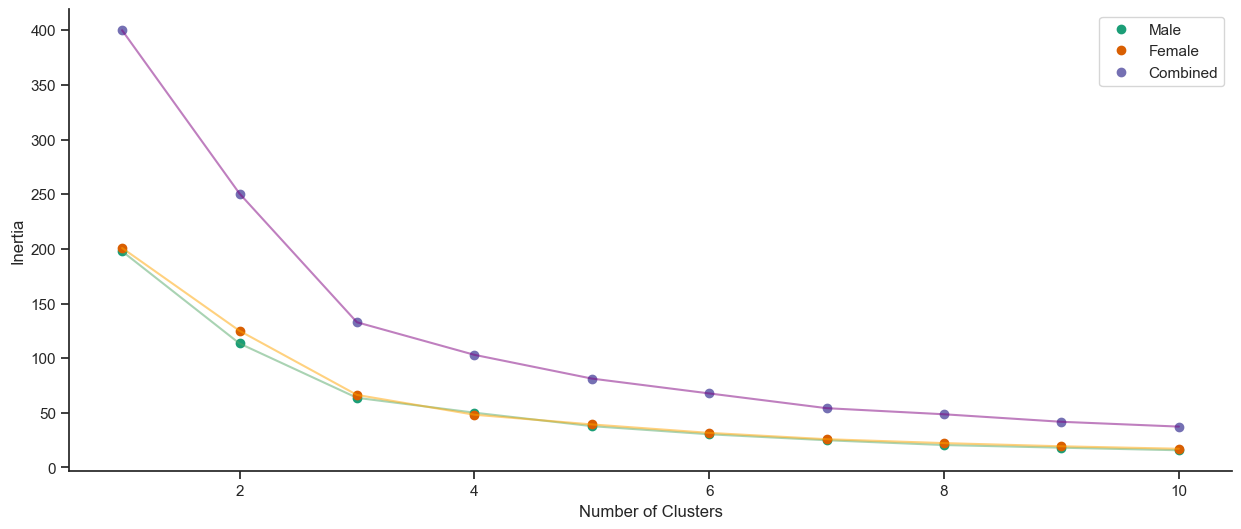

In [19]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia_m, 'o', label = "Male")
plt.plot(np.arange(1 , 11) , inertia_m, '-' , alpha = 0.5, color = 'g')
plt.plot(np.arange(1 , 11) , inertia_f, 'o', label = "Female")
plt.plot(np.arange(1 , 11) , inertia_f, '-' , alpha = 0.5, color = 'orange')
plt.plot(np.arange(1 , 11) , inertia_all, 'o', label = "Combined")
plt.plot(np.arange(1 , 11) , inertia_all, '-' , alpha = 0.5, color = 'purple')
plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(std_features_df)
    score = silhouette_score(X = std_features_df, labels = predict)
    ss_all.append(score)

# Male
ss_m = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(male_std_df)
    score = silhouette_score(X = male_std_df, labels = predict)
    ss_m.append(score)

# Female|
ss_f = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(female_std_df)
    score = silhouette_score(X = female_std_df, labels = predict)
    ss_f.append(score)

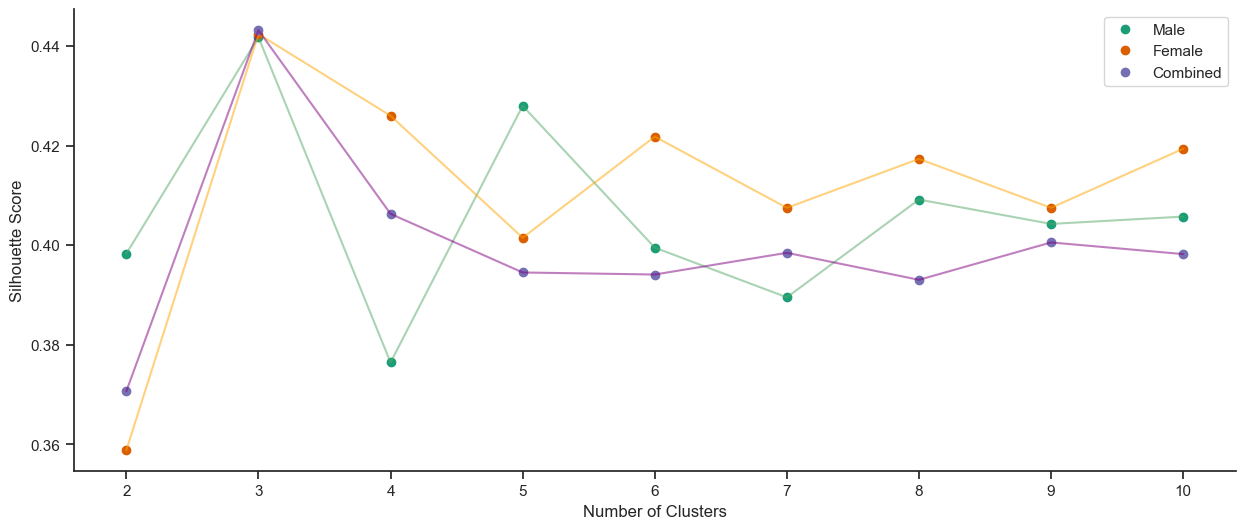

In [21]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_m , 'o', label = "Male")
plt.plot(np.arange(2 , 11) , ss_m , '-' , alpha = 0.5, color = 'g')
plt.plot(np.arange(2 , 11) , ss_f , 'o', label = "Female")
plt.plot(np.arange(2 , 11) , ss_f , '-' , alpha = 0.5, color = 'orange')
plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined")
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

In [22]:
# Apply k-means
km = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
km.fit(std_features_df)
all_labels = km.labels_
all_centroids = km.cluster_centers_

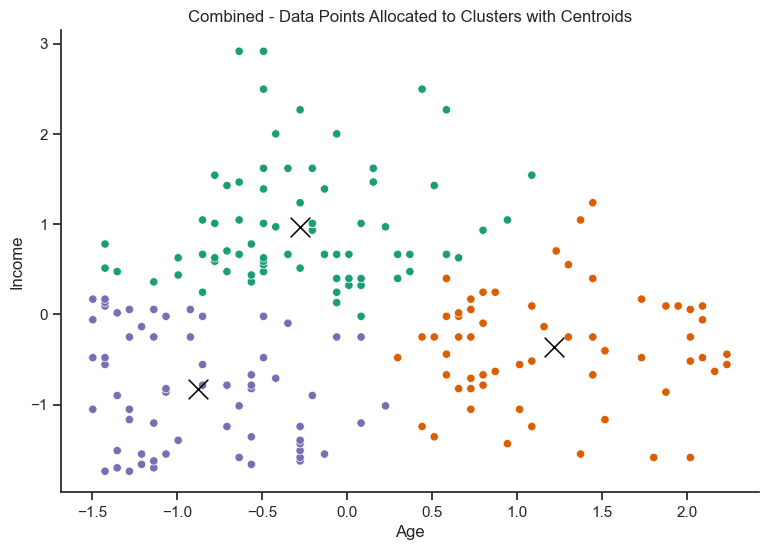

In [23]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = std_features_df.iloc[:, 0], y = std_features_df.iloc[:, -1], hue = all_labels, palette = "Dark2", legend = False)
sns.scatterplot(x = all_centroids[:, 0], y = all_centroids[:, 1], color = "black", marker = "x", s = 200)
plt.ylabel("Income")
plt.xlabel("Age")
plt.title("Combined - Data Points Allocated to Clusters with Centroids")
plt.show()

<AxesSubplot:>

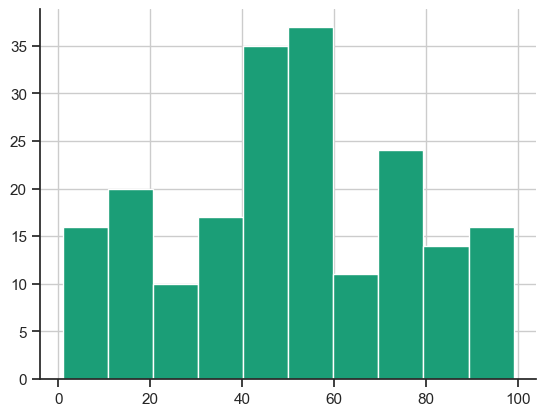

In [25]:
df['Spending Score (1-100)'].hist()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

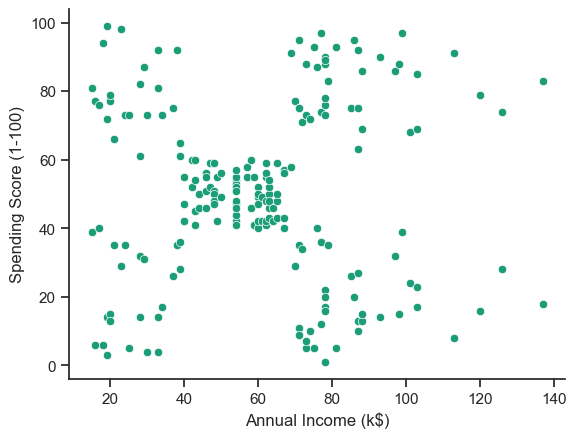

In [26]:
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'])

In [35]:
df_oh = pd.get_dummies(df)
# Display the one-hot encoded dataframe
df_oh 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


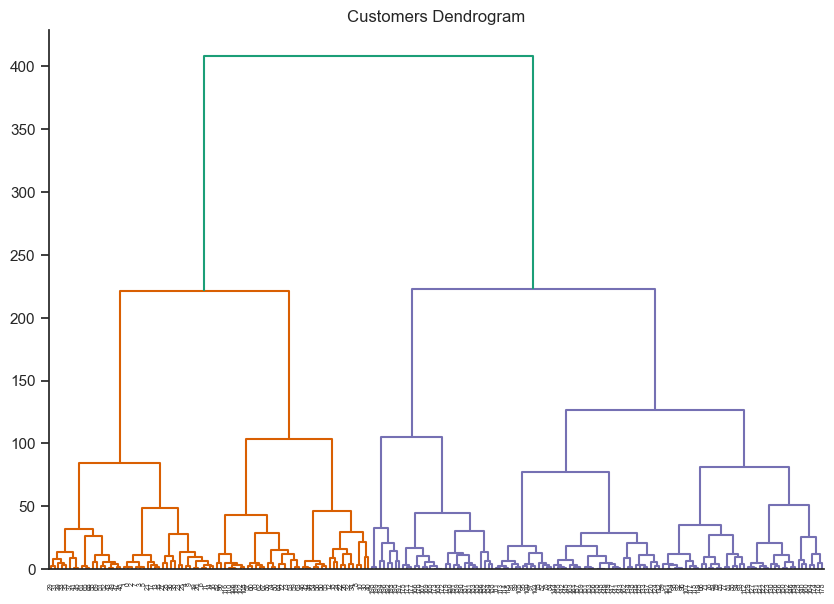

In [37]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = df_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [76]:
from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
